### Data Cleaning Questions

- How do we consolidate `Week` and `Location` data from the 2016 filenames to the final 2016 DataFrame?

## Steps for Cleaning All Data:
---
- [x] Step 1: Clean the 2016 Data (Weeks 1-7) into One DataFrame.
- [x] Step 2: Clean the 2016 Data (Weeks 8) into One DataFrame.
- [x] Step 2.5: Aggregate both 2016 Datasets (Weeks 1-7 and Week 8) into One Bigger DF (Weeks 1-8).
- [x] Step 3: Clean the 2017 Data into One DataFrame.
- [x] Step 3.5: Aggregate the 2016 DataFrame (Weeks 1-8) and the 2017 DF into One Biggest DF (2016-17). 


### Observation that 4/5 may not be exactly equivalent to 8/10 as it is to 9/10...

- [`STRETCH`] Try both scenarios on any related questions!

## What is Cleaning?

- Some data might be irrelevant, redundant, null, nonsensical
- Cleaning involves the steps to reduce the noise in a dataset
- CLEANING: Converting a ton of noise, extracting _signal_, and ending up with a **single source of truth**
- Signal is data that is valuable towards answering a question; extracting signal is our end goal in all types of data science


# Kash Cleaning Tips


### Understand what a column (feature) is truly communicating 
- Examples: [1-5] scale vs. [1-10] vs. "A little too slow" text scale, 

### NULL Values (NaNs)
- 

In [551]:
import glob
import pandas as pd 
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [552]:
# df16 = [pd.read_csv(f) for f in glob.glob('./SA Feedback Surveys_FINAL/2016/*.csv')]

# all_csvs = glob.glob(os.path.join('./SA Feedback Surveys_FINAL/2016/', "*.csv"))
# read_all_csvs = (pd.read_csv(f) for f in all_csvs)
# df = pd.concat(read_all_csvs, ignore_index = True, sort = True)
# df.head()

# the_bad_thing = np.nan
# type(the_bad_thing)

# To-Do List
- [ ] Check all columns to see if they have valid responses
- [ ] #REF! rows invalid
- [ ] Convert all string scors to int values
- [ ] Track, location vs popularity
- [ ] Understand from which region of the country students are most satisfied or dissatisfied 


## Data Cleaning/Manipulation on the 2017 Data

In [553]:
path_2017 = "./SA Feedback Surveys_FINAL/2017/Student Feedback Surveys-Superview.csv"
data_2017 = pd.read_csv(path_2017)

### In order to ensure our empty data in our Schedule Pacing column does not contort our findings, we'll replace the NaNs with a "harmless" value with a datatype that matches the rest of our column.

In this case, since we want to convert our strings to ints, we'll turn our NaNs into ints outside of our expected useful range. 

Since we want to end up with a range of [1, 5], we'll give our NaN values a value of 0. 

In [554]:
data_2017["Schedule Pacing"].unique()

array(['Just right', 'A little too fast', 'Way too slow',
       'A little too slow', 'Way too fast', nan], dtype=object)

## Clever Data Cleaning for _Scheduling Pacing_

In [555]:
def clean_schedule_pacing_2017(data_2017):
    """ Function designed to clean NaNs and convert strings to ints across Scheduling Pacing column of DF 2017. """
    pacing_map = {
        "Way too slow": 1,
        "A little too slow": 2,
        "Just right": 3,
        "A little too fast": 4,
        "Way too fast": 5
    }
    data_2017["Schedule Pacing"] = data_2017["Schedule Pacing"].replace(pacing_map).fillna(0).astype(int)
    return data_2017

## NOTE: Only call this function when cleaning newly initialized 2017 data.

In [556]:
data_2017 = clean_schedule_pacing_2017(data_2017)

In [557]:
data_2017["Schedule Pacing"].unique()

array([3, 4, 1, 2, 5, 0])

In [558]:
# unique_vals = set()

# for value in data_2017["Rating (Num)"]:
#     unique_vals.update([type(value)])

def replace_errors_in_ratings_2017(data_2017):
    arg_all_but_errors = (data_2017["Rating (Num)"] != "#ERROR!")
    data_2017 = data_2017[arg_all_but_errors]
    data_2017["Rating (Num)"] = data_2017["Rating (Num)"].astype(int)
    return data_2017

In [559]:
data_2017 = replace_errors_in_ratings_2017(data_2017)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [560]:
data_2017["Rating (Num)"].unique()

array([ 3,  4,  5,  6,  7,  8,  9, 10,  0,  1,  2])

In [561]:
data_2017["Week"].unique()

array(['Week 1', 'Week 2', 'Week 7', 'Week 3', 'Week 4', 'Week 5',
       'Week 6', 'Week 8'], dtype=object)

In [562]:
data_2017["Track"] = data_2017["Track"].fillna('Track')

In [563]:
data_2017["Track"].unique()

array(['Apps, Explorer', 'Apps', 'Games', 'Track', 'VR',
       'Games, Explorer'], dtype=object)

In [564]:
# df[(df['Sex'] == 'female')].Age.hist(bins=16)
data_2017[(data_2017["Track"] == 'Apps, Explorer')].count()

ID                 224
Location           224
Track              224
Week               224
Rating (Num)       224
Schedule Pacing    224
dtype: int64

In [565]:
data_2017.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing
0,134,San Francisco,"Apps, Explorer",Week 1,3,3
1,36,Los Angeles,Apps,Week 1,4,4
2,117,San Francisco,Games,Week 1,4,1
3,253,NaN,Track,Week 2,4,4
4,350,New York City,"Apps, Explorer",Week 1,4,3


In [566]:
data_2017["Location"].unique()

array(['San Francisco', 'Los Angeles', nan, 'New York City',
       'Redwood City', 'Santa Clara', 'Oakland', 'Washington DC',
       'Chicago', 'Atlanta', 'Hong Kong', 'Beijing', 'Tokyo'],
      dtype=object)

In [567]:
data_2017["Location"] = data_2017["Location"].fillna('Location')

In [568]:
data_2017["ID"].unique()

array([ 134,   36,  117, ..., 1497, 1498, 1499])

In [569]:
# pd.isnull(df.Age).sum()
pd.isnull(data_2017.ID).sum()

0

In [578]:
data_2017["Year"] = "2017"

In [579]:
data_2017

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017
5,23,Redwood City,Apps,Week 1,5,3,2017
6,28,Los Angeles,Apps,Week 7,5,3,2017
7,65,San Francisco,Apps,Week 1,5,2,2017
8,101,Santa Clara,Apps,Week 1,5,2,2017
9,124,Santa Clara,Apps,Week 1,5,3,2017


## Data Cleaning/Manipulation on the 2017 Week 8 Data

In [580]:
csv_2016 = glob.glob(os.path.join('./SA Feedback Surveys_FINAL/2016/', "*.csv"))
read_all_csvs = (pd.read_csv(f) for f in csv_2016)
data_2016 = pd.concat(read_all_csvs, ignore_index = True, sort = True)

# path_2016 = "./SA Feedback Surveys_FINAL/2016/*.csv"
# data_2016 = pd.read_csv(path_2016)

In [581]:
data_2016

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,Unnamed: 0,What track are you in?
0,NaN,3,3,8/5/2016 1:39:41,NaN,NaN
1,NaN,3,4,8/5/2016 1:40:47,NaN,NaN
2,NaN,3,4,8/5/2016 1:40:50,NaN,NaN
3,NaN,4,4,8/5/2016 1:42:44,NaN,NaN
4,NaN,4,5,8/5/2016 1:45:13,NaN,NaN
5,NaN,3,4,8/5/2016 1:45:39,NaN,NaN
6,NaN,3,4,8/5/2016 1:49:21,NaN,NaN
7,NaN,3,5,8/8/2016 1:30:34,NaN,NaN
8,NaN,3,5,8/8/2016 1:33:45,NaN,NaN
9,NaN,3,5,8/8/2016 1:49:29,NaN,NaN


In [582]:
def replace_errors_in_ratings_2016(data_2016):
    arg_all_but_errors = (data_2016["How well is the schedule paced?"] != "#REF!")
    data_2016 = data_2016[arg_all_but_errors]
    return data_2016

In [583]:
data_2016 = replace_errors_in_ratings_2016(data_2016)

In [584]:
# data_2016
data_2016["Year"] = "2016"

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [585]:
data_2016.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,Unnamed: 0,What track are you in?,Year
0,NaN,3,3,8/5/2016 1:39:41,NaN,NaN,2016
1,NaN,3,4,8/5/2016 1:40:47,NaN,NaN,2016
2,NaN,3,4,8/5/2016 1:40:50,NaN,NaN,2016
3,NaN,4,4,8/5/2016 1:42:44,NaN,NaN,2016
4,NaN,4,5,8/5/2016 1:45:13,NaN,NaN,2016


In [586]:
data_2017.head()

,ID,Location,Track,Week,Rating (Num),Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017


In [587]:
# Remove columns with no real information
data_2016 = data_2016.drop(["Unnamed: 0"], axis=1)

In [588]:
data_2016.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,NaN,3,3,8/5/2016 1:39:41,NaN,2016
1,NaN,3,4,8/5/2016 1:40:47,NaN,2016
2,NaN,3,4,8/5/2016 1:40:50,NaN,2016
3,NaN,4,4,8/5/2016 1:42:44,NaN,2016
4,NaN,4,5,8/5/2016 1:45:13,NaN,2016


In [589]:
data_2016["What track are you in?"].unique()

array([nan, 'Intro', 'Games', 'Apps', 'VR'], dtype=object)

In [590]:
data_2016["How well are the tutorials paced?"] = data_2016["How well are the tutorials paced?"].fillna(0).astype(int)

In [591]:
data_2016["How well is the schedule paced?"] = data_2016["How well are the tutorials paced?"].fillna(0).astype(int)

In [592]:
data_2016["How would you rate your overall satisfaction with the Summer Academy this week?"] = data_2016["How would you rate your overall satisfaction with the Summer Academy this week?"].fillna(0).astype(int)

In [593]:
data_2016

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,0,0,3,8/5/2016 1:39:41,NaN,2016
1,0,0,4,8/5/2016 1:40:47,NaN,2016
2,0,0,4,8/5/2016 1:40:50,NaN,2016
3,0,0,4,8/5/2016 1:42:44,NaN,2016
4,0,0,5,8/5/2016 1:45:13,NaN,2016
5,0,0,4,8/5/2016 1:45:39,NaN,2016
6,0,0,4,8/5/2016 1:49:21,NaN,2016
7,0,0,5,8/8/2016 1:30:34,NaN,2016
8,0,0,5,8/8/2016 1:33:45,NaN,2016
9,0,0,5,8/8/2016 1:49:29,NaN,2016


In [594]:
data_2016["What track are you in?"] = data_2016["What track are you in?"].fillna("Track")

In [595]:
data_2016.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,0,0,3,8/5/2016 1:39:41,Track,2016
1,0,0,4,8/5/2016 1:40:47,Track,2016
2,0,0,4,8/5/2016 1:40:50,Track,2016
3,0,0,4,8/5/2016 1:42:44,Track,2016
4,0,0,5,8/5/2016 1:45:13,Track,2016


In [596]:
data_2016["Timestamp"] = data_2016["Timestamp"].fillna("Timestamp")

In [597]:
data_2016["Timestamp"].isna().sum()

0

In [598]:
data_2016.head()

,How well are the tutorials paced?,How well is the schedule paced?,How would you rate your overall satisfaction with the Summer Academy this week?,Timestamp,What track are you in?,Year
0,0,0,3,8/5/2016 1:39:41,Track,2016
1,0,0,4,8/5/2016 1:40:47,Track,2016
2,0,0,4,8/5/2016 1:40:50,Track,2016
3,0,0,4,8/5/2016 1:42:44,Track,2016
4,0,0,5,8/5/2016 1:45:13,Track,2016


In [619]:
data_2017.head()

,ID,Location,Track,Week,Week Rating,Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017


In [620]:
# df.rename(columns={'oldName1': 'newName1', 'oldName2': 'newName2'}, inplace=True)

data_2016.rename(columns={
    "How well are the tutorials paced?": "Tutorial Pacing",
    "How well is the schedule paced?": "Schedule Pacing",
    "How would you rate your overall satisfaction with the Summer Academy this week?": "Week Rating",
    "What track are you in?": "Track"
}, inplace=True)

In [621]:
data_2017.rename(columns={
    "Rating (Num)": "Week Rating"
}, inplace=True)

In [622]:
data_2017.head()

,ID,Location,Track,Week,Week Rating,Schedule Pacing,Year
0,134,San Francisco,"Apps, Explorer",Week 1,3,3,2017
1,36,Los Angeles,Apps,Week 1,4,4,2017
2,117,San Francisco,Games,Week 1,4,1,2017
3,253,Location,Track,Week 2,4,4,2017
4,350,New York City,"Apps, Explorer",Week 1,4,3,2017


In [623]:
data_2016.head()

,Tutorial Pacing,Schedule Pacing,Week Rating,Timestamp,Track,Year
0,0,0,3,8/5/2016 1:39:41,Track,2016
1,0,0,4,8/5/2016 1:40:47,Track,2016
2,0,0,4,8/5/2016 1:40:50,Track,2016
3,0,0,4,8/5/2016 1:42:44,Track,2016
4,0,0,5,8/5/2016 1:45:13,Track,2016


In [654]:
# pd.merge(adf, bdf, how='left')

# df16_17 = pd.merge(data_2016, data_2017, how='outer')
df16_17 = pd.concat([data_2016, data_2017], ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [655]:
df16_17.head()

,ID,Location,Schedule Pacing,Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,NaN,NaN,0,8/5/2016 1:39:41,Track,0.0,NaN,3,2016
1,NaN,NaN,0,8/5/2016 1:40:47,Track,0.0,NaN,4,2016
2,NaN,NaN,0,8/5/2016 1:40:50,Track,0.0,NaN,4,2016
3,NaN,NaN,0,8/5/2016 1:42:44,Track,0.0,NaN,4,2016
4,NaN,NaN,0,8/5/2016 1:45:13,Track,0.0,NaN,5,2016


In [656]:
# data_2016 = data_2016.drop(["Unnamed: 0"], axis=1)
df16_17 = df16_17.drop(["ID"], axis=1)

In [657]:
# df16_17["Location"] = df16_17["Location"].fillna("Location")

In [658]:
df16_17["Year"].unique()

array(['2016', '2017'], dtype=object)

In [659]:
df16_17["Location"].unique()

array([nan, 'San Francisco', 'Los Angeles', 'Location', 'New York City',
       'Redwood City', 'Santa Clara', 'Oakland', 'Washington DC',
       'Chicago', 'Atlanta', 'Hong Kong', 'Beijing', 'Tokyo'],
      dtype=object)

In [660]:
df16_17["Location"] = df16_17["Location"].fillna("Location")

In [661]:
df16_17["Week"] = df16_17["Week"].fillna("NoWeek")

In [662]:
df16_17["Week"].unique()

array(['NoWeek', 'Week 1', 'Week 2', 'Week 7', 'Week 3', 'Week 4',
       'Week 5', 'Week 6', 'Week 8'], dtype=object)

In [663]:
df16_17.head()

,Location,Schedule Pacing,Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,Location,0,8/5/2016 1:39:41,Track,0.0,NoWeek,3,2016
1,Location,0,8/5/2016 1:40:47,Track,0.0,NoWeek,4,2016
2,Location,0,8/5/2016 1:40:50,Track,0.0,NoWeek,4,2016
3,Location,0,8/5/2016 1:42:44,Track,0.0,NoWeek,4,2016
4,Location,0,8/5/2016 1:45:13,Track,0.0,NoWeek,5,2016


In [664]:
path_week8 = "./SA Feedback Surveys_FINAL/Week 8 Feedback (2016, incomplete) - results.csv"
data_week8 = pd.read_csv(path_week8)

In [665]:
data_week8 = data_week8.drop(["#", "Network ID"], axis=1)

In [666]:
data_week8

,How likely is it that you would recommend the Make School Summer Academy to a friend?,location,track,Start Date (UTC),Submit Date (UTC)
0,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04
1,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04
2,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05
3,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06
4,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11
5,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13
6,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14
7,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15
8,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21
9,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27


In [667]:
data_week8.rename(columns={
    "How likely is it that you would recommend the Make School Summer Academy to a friend?": "Overall Rating",
    "location": "Location",
    "track": "Track"
}, inplace=True)

In [668]:
data_week8

,Overall Rating,Location,Track,Start Date (UTC),Submit Date (UTC)
0,10,New York,summerApps,9/7/16 1:03,9/7/16 1:04
1,10,San Francisco,summerIntro,9/7/16 1:03,9/7/16 1:04
2,10,New York,summerIntro,9/7/16 1:03,9/7/16 1:05
3,9,Sunnyvale,summerApps (4-week),9/7/16 1:04,9/7/16 1:06
4,3,San Francisco,summerIntro,9/7/16 1:04,9/7/16 1:11
5,10,San Francisco,summerApps,9/7/16 1:09,9/7/16 1:13
6,8,San Francisco,summerApps,9/7/16 1:04,9/7/16 1:14
7,3,New York,summerGames,9/7/16 1:14,9/7/16 1:15
8,6,Singapore,summerApps,9/7/16 1:16,9/7/16 1:21
9,9,New York,summerGames,9/7/16 1:22,9/7/16 1:27


In [669]:
# w.female[w.female == 'female'] = 1
data_week8.Track[data_week8.Track == 'summerGames'] = 'Games'
data_week8.Track[data_week8.Track == 'summerApps'] = 'Apps'
data_week8.Track[data_week8.Track == 'summerIntro'] = 'Intro'
data_week8.Track[data_week8.Track == 'summerVR'] = 'VR'
data_week8.Track[data_week8.Track == 'summerGames (4-week)'] = 'Games (4-week)'
data_week8.Track[data_week8.Track == 'summerApps (4-week)'] = 'Apps (4-week)'

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/lib/python3.7/site-packages/ip

In [670]:
data_week8["Year"] = "2016"

In [671]:
df16_17.head()

,Location,Schedule Pacing,Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,Location,0,8/5/2016 1:39:41,Track,0.0,NoWeek,3,2016
1,Location,0,8/5/2016 1:40:47,Track,0.0,NoWeek,4,2016
2,Location,0,8/5/2016 1:40:50,Track,0.0,NoWeek,4,2016
3,Location,0,8/5/2016 1:42:44,Track,0.0,NoWeek,4,2016
4,Location,0,8/5/2016 1:45:13,Track,0.0,NoWeek,5,2016


In [672]:
df16_17["Timestamp"].unique()

array(['8/5/2016 1:39:41', '8/5/2016 1:40:47', '8/5/2016 1:40:50',
       '8/5/2016 1:42:44', '8/5/2016 1:45:13', '8/5/2016 1:45:39',
       '8/5/2016 1:49:21', '8/8/2016 1:30:34', '8/8/2016 1:33:45',
       '8/8/2016 1:49:29', '8/8/2016 1:51:00', '7/31/2016 1:04:57',
       '7/31/2016 3:38:14', '7/31/2016 3:59:43', '7/31/2016 4:19:51',
       '7/31/2016 5:14:20', '7/31/2016 6:50:12', '7/31/2016 15:23:52',
       '7/31/2016 16:49:45', '8/1/2016 1:18:47', '8/1/2016 1:30:17',
       '8/1/2016 6:15:10', '8/1/2016 7:56:08', '6/23/2016 22:24:53',
       '6/27/2016 4:03:03', '6/23/2016 22:13:04', '6/23/2016 22:09:23',
       '6/23/2016 22:11:39', '6/23/2016 22:11:44', '6/23/2016 22:13:25',
       '6/23/2016 22:15:33', '6/23/2016 22:41:02', '6/23/2016 23:56:36',
       '6/25/2016 22:17:48', '6/23/2016 22:13:09', '8/5/2016 11:22:50',
       '8/5/2016 11:23:13', '8/5/2016 11:24:20', '8/5/2016 11:29:26',
       '8/5/2016 11:31:08', '8/5/2016 11:57:53', '8/5/2016 13:23:30',
       '8/5/2016 13:58

In [673]:
# all_data = pd.merge(df16_17, data_week8, how='outer')
all_data = pd.concat([df16_17, data_week8], ignore_index=True)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [674]:
all_data.head()

,Location,Overall Rating,Schedule Pacing,Start Date (UTC),Submit Date (UTC),Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,Location,NaN,0.0,NaN,NaN,8/5/2016 1:39:41,Track,0.0,NoWeek,3.0,2016
1,Location,NaN,0.0,NaN,NaN,8/5/2016 1:40:47,Track,0.0,NoWeek,4.0,2016
2,Location,NaN,0.0,NaN,NaN,8/5/2016 1:40:50,Track,0.0,NoWeek,4.0,2016
3,Location,NaN,0.0,NaN,NaN,8/5/2016 1:42:44,Track,0.0,NoWeek,4.0,2016
4,Location,NaN,0.0,NaN,NaN,8/5/2016 1:45:13,Track,0.0,NoWeek,5.0,2016


In [675]:
all_data["Overall Rating"].unique()

array([nan, 10.,  9.,  3.,  8.,  6.,  7.,  4.,  5.])

In [680]:
all_data["Overall Rating"] = all_data["Week Rating"].fillna(0).astype(int)
all_data["Start Date (UTC)"] = all_data["Start Date (UTC)"].fillna("Start Date")
all_data["Submit Date (UTC)"] = all_data["Submit Date (UTC)"].fillna("Submit Date")
all_data["Tutorial Pacing"] = all_data["Tutorial Pacing"].fillna(0).astype(int)
all_data["Week"] = all_data["Week"].fillna("NoWeek")
all_data["Week Rating"] = all_data["Week Rating"].fillna(0).astype(int)
all_data["Timestamp"] = all_data["Timestamp"].fillna("Timestamp")
all_data["Schedule Pacing"] = all_data["Schedule Pacing"].fillna(0).astype(int)

In [681]:
all_data.isna().sum()

Location             0
Overall Rating       0
Schedule Pacing      0
Start Date (UTC)     0
Submit Date (UTC)    0
Timestamp            0
Track                0
Tutorial Pacing      0
Week                 0
Week Rating          0
Year                 0
dtype: int64

In [682]:
all_data

,Location,Overall Rating,Schedule Pacing,Start Date (UTC),Submit Date (UTC),Timestamp,Track,Tutorial Pacing,Week,Week Rating,Year
0,Location,3,0,Start Date,Submit Date,8/5/2016 1:39:41,Track,0,NoWeek,3,2016
1,Location,4,0,Start Date,Submit Date,8/5/2016 1:40:47,Track,0,NoWeek,4,2016
2,Location,4,0,Start Date,Submit Date,8/5/2016 1:40:50,Track,0,NoWeek,4,2016
3,Location,4,0,Start Date,Submit Date,8/5/2016 1:42:44,Track,0,NoWeek,4,2016
4,Location,5,0,Start Date,Submit Date,8/5/2016 1:45:13,Track,0,NoWeek,5,2016
5,Location,4,0,Start Date,Submit Date,8/5/2016 1:45:39,Track,0,NoWeek,4,2016
6,Location,4,0,Start Date,Submit Date,8/5/2016 1:49:21,Track,0,NoWeek,4,2016
7,Location,5,0,Start Date,Submit Date,8/8/2016 1:30:34,Track,0,NoWeek,5,2016
8,Location,5,0,Start Date,Submit Date,8/8/2016 1:33:45,Track,0,NoWeek,5,2016
9,Location,5,0,Start Date,Submit Date,8/8/2016 1:49:29,Track,0,NoWeek,5,2016


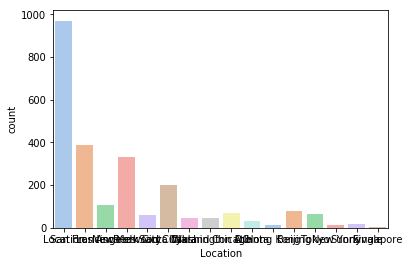

In [683]:
sns.countplot(x='Location', palette='pastel', data=all_data)

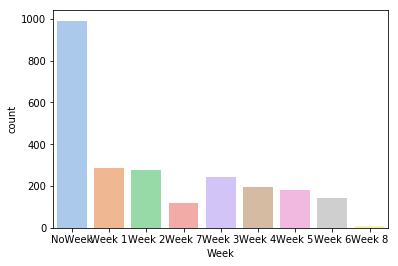

In [684]:
sns.countplot(x='Week', palette='pastel', data=all_data)

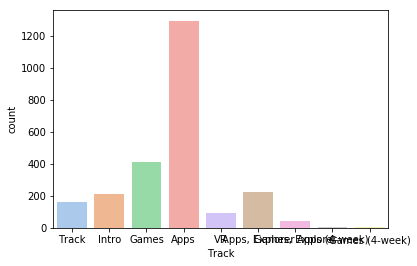

In [685]:
sns.countplot(x='Track', palette='pastel', data=all_data)